In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import sys, os

In [2]:
df_1 = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'def_n_com_sex_ed_19-21.csv'), sep = '\t') #2019 - 2020, por sexo, edades
df_1 = df_1.fillna(0)        
df_1

,Comunidades autónomas,Sexo,Edad (grupos quinquenales),Tipo de dato,Periodo,Total
0,Total Nacional,Total,Todas las edades,Dato base,2021SM38,7.023
1,Total Nacional,Total,Todas las edades,Dato base,2021SM37,7.489
2,Total Nacional,Total,Todas las edades,Dato base,2021SM36,8.003
3,Total Nacional,Total,Todas las edades,Dato base,2021SM35,7.994
4,Total Nacional,Total,Todas las edades,Dato base,2021SM34,8.356
...,...,...,...,...,...,...
720715,19 Melilla,Mujeres,No consta,Diferencia absoluta con respecto a 2019 del ac...,2019SM05,0.000
720716,19 Melilla,Mujeres,No consta,Diferencia absoluta con respecto a 2019 del ac...,2019SM04,0.000
720717,19 Melilla,Mujeres,No consta,Diferencia absoluta con respecto a 2019 del ac...,2019SM03,0.000
720718,19 Melilla,Mujeres,No consta,Diferencia absoluta con respecto a 2019 del ac...,2019SM02,0.000


In [3]:
df_1 = df_1.rename(columns={'Edad (grupos quinquenales)':'Edad'})

In [4]:
# eliminamos datos innecesarios
df_1 = df_1.drop(df_1[df_1['Edad'] == 'No consta'].index)

In [5]:
# Escogemos todos los datos del país entero sin distinción de sexo,
# desde que se detectó el primer caso COVID
total = df_1.iloc[0:143]
total = total[::-1]
total

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
142,Total Nacional,Total,Todas las edades,Dato base,2019SM01,9.127
141,Total Nacional,Total,Todas las edades,Dato base,2019SM02,10.025
140,Total Nacional,Total,Todas las edades,Dato base,2019SM03,10.476
139,Total Nacional,Total,Todas las edades,Dato base,2019SM04,10.141
138,Total Nacional,Total,Todas las edades,Dato base,2019SM05,9.964
...,...,...,...,...,...,...
4,Total Nacional,Total,Todas las edades,Dato base,2021SM34,8.356
3,Total Nacional,Total,Todas las edades,Dato base,2021SM35,7.994
2,Total Nacional,Total,Todas las edades,Dato base,2021SM36,8.003
1,Total Nacional,Total,Todas las edades,Dato base,2021SM37,7.489


In [6]:
total_hombres = df_1[(df_1['Sexo'] == 'Hombres') &
                    (df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Dato base') &
                    (df_1['Edad'] == 'Todas las edades')]

array = np.array(total_hombres['Periodo'])
indice = 0
for i in array:
    if '2020' in i or '2021' in i or '2019' in i:
        indice += 1

total_hombres = total_hombres.iloc[0:indice]
total_hombres = total_hombres[::-1]
total_hombres

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
12154,Total Nacional,Hombres,Todas las edades,Dato base,2019SM01,4.604
12153,Total Nacional,Hombres,Todas las edades,Dato base,2019SM02,5.007
12152,Total Nacional,Hombres,Todas las edades,Dato base,2019SM03,5.173
12151,Total Nacional,Hombres,Todas las edades,Dato base,2019SM04,5.070
12150,Total Nacional,Hombres,Todas las edades,Dato base,2019SM05,4.934
...,...,...,...,...,...,...
12016,Total Nacional,Hombres,Todas las edades,Dato base,2021SM34,4.217
12015,Total Nacional,Hombres,Todas las edades,Dato base,2021SM35,4.119
12014,Total Nacional,Hombres,Todas las edades,Dato base,2021SM36,4.050
12013,Total Nacional,Hombres,Todas las edades,Dato base,2021SM37,3.855


In [7]:
total_mujeres = df_1[(df_1['Sexo'] == 'Mujeres') &
                    (df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Dato base') &
                    (df_1['Edad'] == 'Todas las edades')]

total_mujeres = total_mujeres.iloc[0:indice]
total_mujeres = total_mujeres[::-1]
total_mujeres

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
24166,Total Nacional,Mujeres,Todas las edades,Dato base,2019SM01,4.523
24165,Total Nacional,Mujeres,Todas las edades,Dato base,2019SM02,5.018
24164,Total Nacional,Mujeres,Todas las edades,Dato base,2019SM03,5.303
24163,Total Nacional,Mujeres,Todas las edades,Dato base,2019SM04,5.071
24162,Total Nacional,Mujeres,Todas las edades,Dato base,2019SM05,5.030
...,...,...,...,...,...,...
24028,Total Nacional,Mujeres,Todas las edades,Dato base,2021SM34,4.138
24027,Total Nacional,Mujeres,Todas las edades,Dato base,2021SM35,3.874
24026,Total Nacional,Mujeres,Todas las edades,Dato base,2021SM36,3.953
24025,Total Nacional,Mujeres,Todas las edades,Dato base,2021SM37,3.634


In [8]:
dates = list(total['Periodo'])
new_dates = []
for i in dates:
    pal = i[6:] + '/' + i[2:4]
    new_dates.append(pal)

print(new_dates)

['01/19', '02/19', '03/19', '04/19', '05/19', '06/19', '07/19', '08/19', '09/19', '10/19', '11/19', '12/19', '13/19', '14/19', '15/19', '16/19', '17/19', '18/19', '19/19', '20/19', '21/19', '22/19', '23/19', '24/19', '25/19', '26/19', '27/19', '28/19', '29/19', '30/19', '31/19', '32/19', '33/19', '34/19', '35/19', '36/19', '37/19', '38/19', '39/19', '40/19', '41/19', '42/19', '43/19', '44/19', '45/19', '46/19', '47/19', '48/19', '49/19', '50/19', '51/19', '52/19', '01/20', '02/20', '03/20', '04/20', '05/20', '06/20', '07/20', '08/20', '09/20', '10/20', '11/20', '12/20', '13/20', '14/20', '15/20', '16/20', '17/20', '18/20', '19/20', '20/20', '21/20', '22/20', '23/20', '24/20', '25/20', '26/20', '27/20', '28/20', '29/20', '30/20', '31/20', '32/20', '33/20', '34/20', '35/20', '36/20', '37/20', '38/20', '39/20', '40/20', '41/20', '42/20', '43/20', '44/20', '45/20', '46/20', '47/20', '48/20', '49/20', '50/20', '51/20', '52/20', '53/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', 

In [9]:
trace_h = go.Scatter(
                    x = new_dates,
                    y = total_hombres['Total'] * 1000,
                    name = 'Hombres',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 24, 211, 1)'))

trace_m = go.Scatter(
                    x = new_dates,
                    y = total_mujeres['Total'] * 1000,
                    name = 'Mujeres',
                    mode= 'lines',
                    marker = dict(color = 'rgba(255, 0, 0, 1)'))

trace_t = go.Scatter(
                    x = new_dates,
                    y = total['Total'] * 1000,
                    name = 'Total',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 143, 25, 1)'))

data = [trace_h, trace_m, trace_t]

layout = dict(title = 'Defunciones periodo 2019-2021 por sexo',
             xaxis= dict(title= 'Defunciones Totales',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'defunciones.html'))


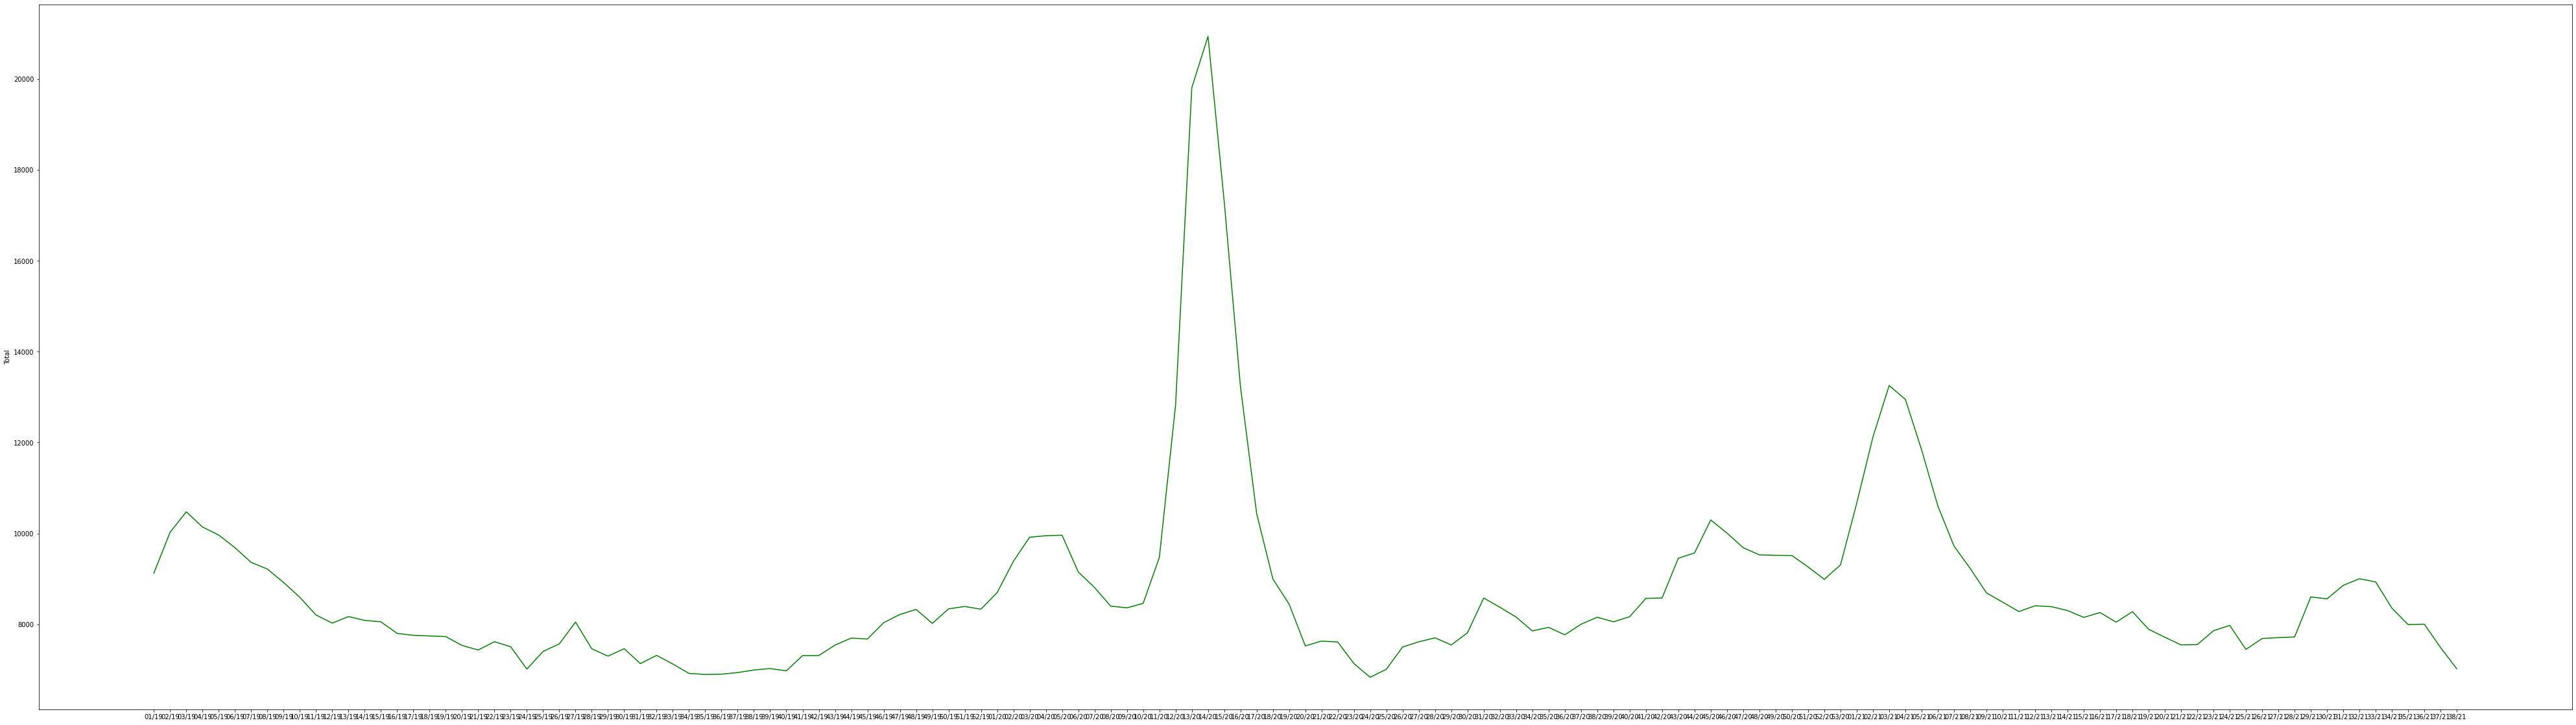

In [10]:
# Evolución ncional de defunciones de la pandemia
plt.figure(figsize=(70,20))
sns.lineplot(x = new_dates, y = total['Total'] * 1000, color = 'g');

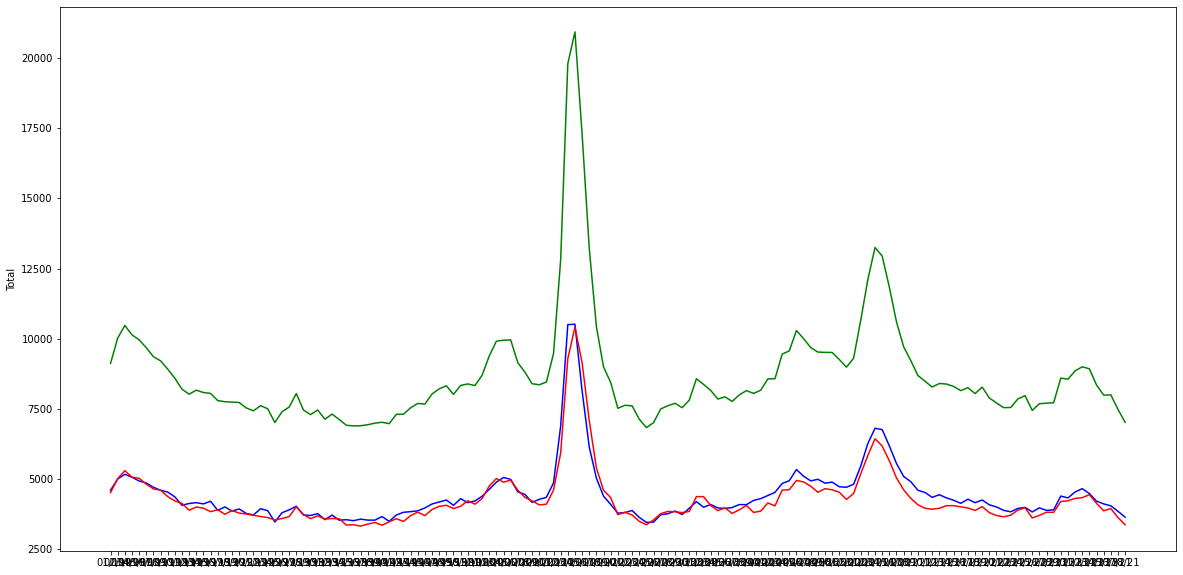

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(x = new_dates, y = total_hombres['Total'] * 1000, color = 'b');
sns.lineplot(x = new_dates, y = total_mujeres['Total'] * 1000, color = 'r');
sns.lineplot(x = new_dates, y = total['Total'] * 1000, color = 'g');

In [12]:
# Ahora veremos analizaremos los datos acumulados
total_acum = df_1[(df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Acumulado en lo que va de año') &
                    (df_1['Edad'] == 'Todas las edades') &
                    (df_1['Sexo'] == 'Total')]

total_acum = total_acum[::-1]
total_acum

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
285,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2019SM01,9.127
284,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2019SM02,19.152
283,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2019SM03,29.628
282,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2019SM04,39.769
281,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2019SM05,49.733
...,...,...,...,...,...,...
147,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2021SM34,303.110
146,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2021SM35,311.104
145,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2021SM36,319.107
144,Total Nacional,Total,Todas las edades,Acumulado en lo que va de año,2021SM37,326.596


In [13]:
dates = list(total_acum['Periodo'])
dates_19 = []
for i in dates:
    pal = i[6:] + '/' + i[2:4]
    dates_19.append(pal)

print(dates_19)

['01/19', '02/19', '03/19', '04/19', '05/19', '06/19', '07/19', '08/19', '09/19', '10/19', '11/19', '12/19', '13/19', '14/19', '15/19', '16/19', '17/19', '18/19', '19/19', '20/19', '21/19', '22/19', '23/19', '24/19', '25/19', '26/19', '27/19', '28/19', '29/19', '30/19', '31/19', '32/19', '33/19', '34/19', '35/19', '36/19', '37/19', '38/19', '39/19', '40/19', '41/19', '42/19', '43/19', '44/19', '45/19', '46/19', '47/19', '48/19', '49/19', '50/19', '51/19', '52/19', '01/20', '02/20', '03/20', '04/20', '05/20', '06/20', '07/20', '08/20', '09/20', '10/20', '11/20', '12/20', '13/20', '14/20', '15/20', '16/20', '17/20', '18/20', '19/20', '20/20', '21/20', '22/20', '23/20', '24/20', '25/20', '26/20', '27/20', '28/20', '29/20', '30/20', '31/20', '32/20', '33/20', '34/20', '35/20', '36/20', '37/20', '38/20', '39/20', '40/20', '41/20', '42/20', '43/20', '44/20', '45/20', '46/20', '47/20', '48/20', '49/20', '50/20', '51/20', '52/20', '53/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', 

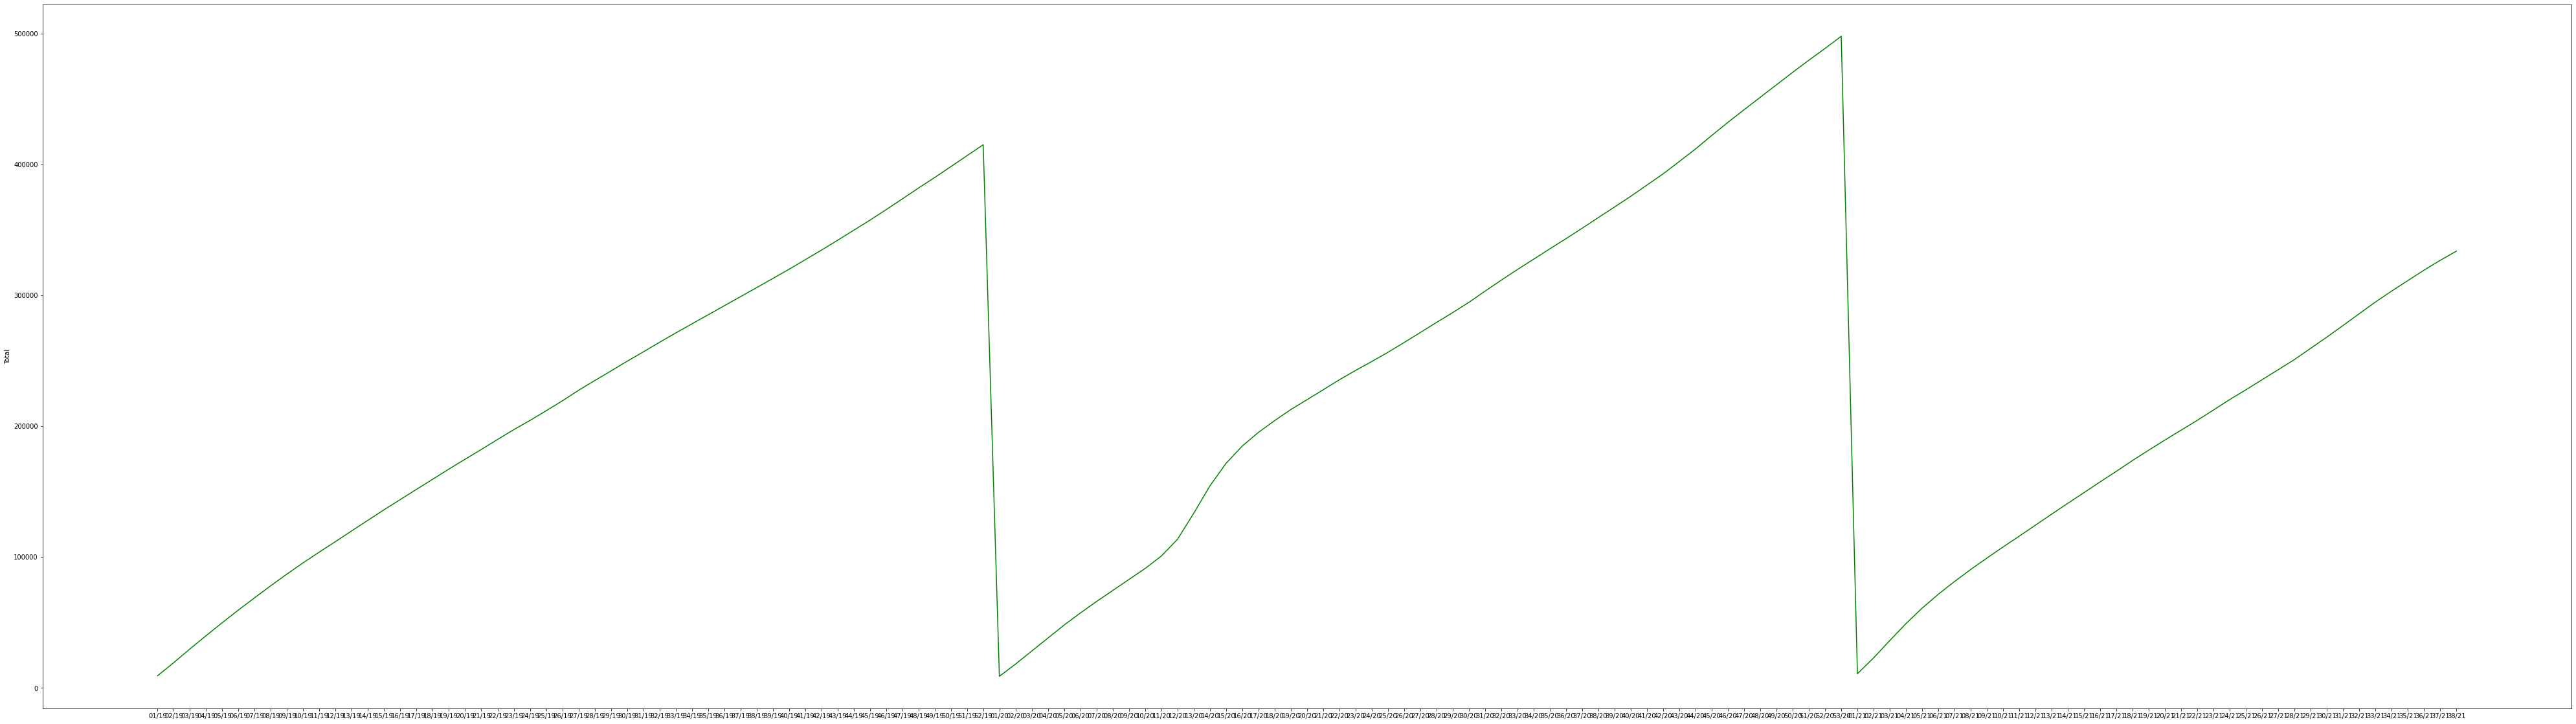

In [14]:
plt.figure(figsize=(70,20))
sns.lineplot(x = dates_19, y = total_acum['Total'] * 1000, color = 'g');

In [15]:
total_acum_h = df_1[(df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Acumulado en lo que va de año') &
                    (df_1['Edad'] == 'Todas las edades') &
                    (df_1['Sexo'] == 'Hombres')]

total_acum_h = total_acum_h[::-1]
total_acum_h

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
12297,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2019SM01,4.604
12296,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2019SM02,9.611
12295,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2019SM03,14.784
12294,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2019SM04,19.854
12293,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2019SM05,24.788
...,...,...,...,...,...,...
12159,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2021SM34,156.451
12158,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2021SM35,160.570
12157,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2021SM36,164.620
12156,Total Nacional,Hombres,Todas las edades,Acumulado en lo que va de año,2021SM37,168.475


In [16]:
total_acum_m = df_1[(df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Acumulado en lo que va de año') &
                    (df_1['Edad'] == 'Todas las edades') &
                    (df_1['Sexo'] == 'Mujeres')]

total_acum_m = total_acum_m[::-1]
total_acum_m

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
24309,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2019SM01,4.523
24308,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2019SM02,9.541
24307,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2019SM03,14.844
24306,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2019SM04,19.915
24305,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2019SM05,24.945
...,...,...,...,...,...,...
24171,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2021SM34,146.660
24170,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2021SM35,150.534
24169,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2021SM36,154.487
24168,Total Nacional,Mujeres,Todas las edades,Acumulado en lo que va de año,2021SM37,158.121


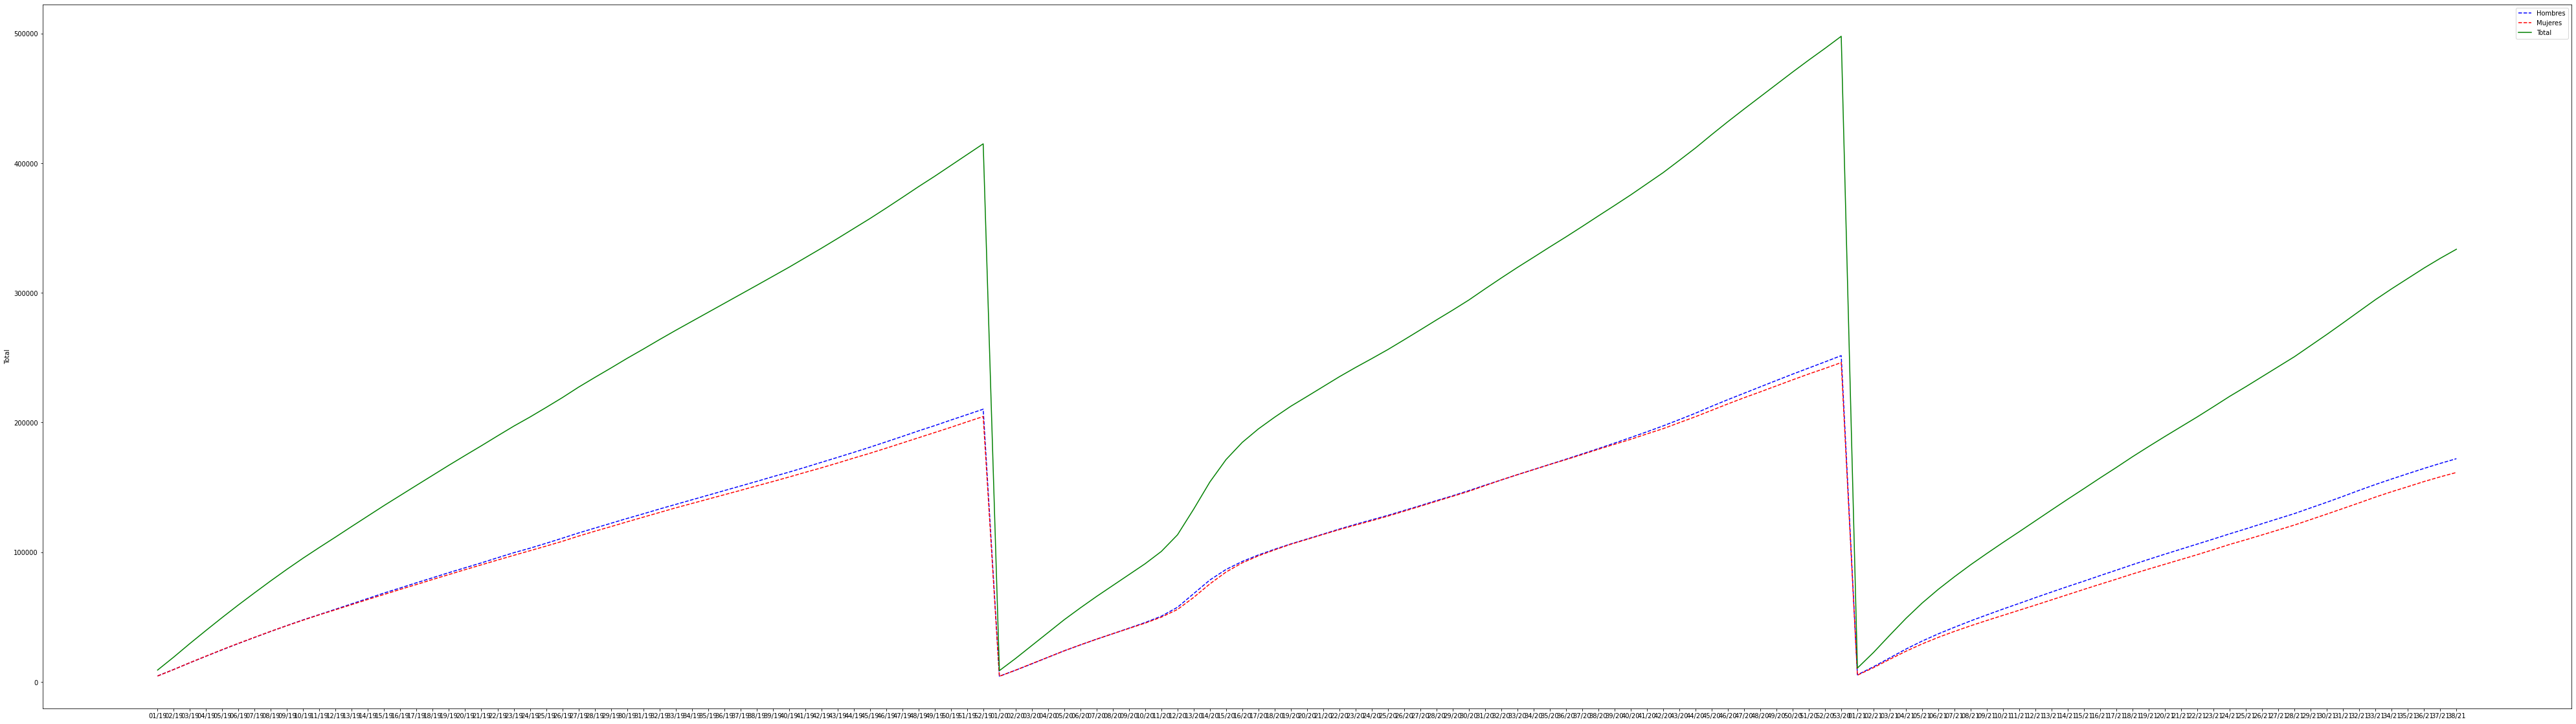

In [17]:
plt.figure(figsize=(70,20))
sns.lineplot(x = dates_19, y = total_acum_h['Total'] * 1000, color = 'b', label = 'Hombres', linestyle = '--');
sns.lineplot(x = dates_19, y = total_acum_m['Total'] * 1000, color = 'r', label = 'Mujeres', linestyle = '--');
sns.lineplot(x = dates_19, y = total_acum['Total'] * 1000, color = 'g', label = 'Total');
plt.legend()
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'acum_sexo.png'))

In [18]:
trace_h = go.Scatter(
                    x = dates_19,
                    y = total_acum_h['Total'] * 1000,
                    name = 'Hombres',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 24, 211, 1)'))

trace_m = go.Scatter(
                    x = dates_19,
                    y = total_acum_m['Total'] * 1000,
                    name = 'Mujeres',
                    mode= 'lines',
                    marker = dict(color = 'rgba(255, 0, 0, 1)'))

trace_t = go.Scatter(
                    x = dates_19,
                    y = total_acum['Total'] * 1000,
                    name = 'Total',
                    mode= 'lines',
                    marker = dict(color = 'rgba(0, 143, 25, 1)'))

data = [trace_h, trace_m, trace_t]

layout = dict(title = 'Defunciones acumuladas periodo 2019-2021 por sexo',
             xaxis= dict(title= 'Defunciones Acumuladas Totales',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'def_acum_sexo.html'))

In [19]:
# Comprobamos los rangos de edad que hay
df_1['Edad'].unique()

array(['Todas las edades', 'De 0 a 4 años', 'De 5 a 9 años',
       'De 10 a 14 años  ', 'De 15 a 19 años  ', 'De 20 a 24 años',
       'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años',
       'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años',
       'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años',
       'De 70 a 74 años  ', 'De 75 a 79 años  ', 'De 80 a 84 años  ',
       'De 85 a 89 años  ', '90 y más años'], dtype=object)

In [20]:
edades = df_1[(df_1['Comunidades autónomas'] == 'Total Nacional') &
                    (df_1['Tipo de dato'] == 'Dato base') &
                    (df_1['Sexo'] == 'Total') &
                    (df_1['Edad'] != 'Todas las edades')]

edades = edades[::-1]
columna = []
for i in edades['Total']:
    i = str(i)
    a1 = i.split('.')[0]
    a2 = i.split('.')[1]
    if int(a2) == 0:
        i = a1
    else:
        i = a1 + a2
    i = float(i)
    columna.append(i)
edades['Total'] = columna
edades.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'edades.csv'), header = True, index = False)
edades

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
11010,Total Nacional,Total,90 y más años,Dato base,2019SM01,2306.0
11009,Total Nacional,Total,90 y más años,Dato base,2019SM02,2643.0
11008,Total Nacional,Total,90 y más años,Dato base,2019SM03,2824.0
11007,Total Nacional,Total,90 y más años,Dato base,2019SM04,27.0
11006,Total Nacional,Total,90 y más años,Dato base,2019SM05,271.0
...,...,...,...,...,...,...
576,Total Nacional,Total,De 0 a 4 años,Dato base,2021SM34,32.0
575,Total Nacional,Total,De 0 a 4 años,Dato base,2021SM35,26.0
574,Total Nacional,Total,De 0 a 4 años,Dato base,2021SM36,17.0
573,Total Nacional,Total,De 0 a 4 años,Dato base,2021SM37,26.0


In [21]:
de_0_4 = edades[edades['Edad'] == 'De 0 a 4 años']
de_5_9 = edades[edades['Edad'] == 'De 5 a 9 años']
de_10_14 = edades[edades['Edad'] == 'De 10 a 14 años  ']
de_15_19 = edades[edades['Edad'] == 'De 15 a 19 años  ']
de_20_24 = edades[edades['Edad'] == 'De 20 a 24 años']
de_25_29 = edades[edades['Edad'] == 'De 25 a 29 años']
de_30_34 = edades[edades['Edad'] == 'De 30 a 34 años']
de_35_39 = edades[edades['Edad'] == 'De 35 a 39 años']
de_40_44 = edades[edades['Edad'] == 'De 40 a 44 años']
de_45_49 = edades[edades['Edad'] == 'De 45 a 49 años']
de_50_54 = edades[edades['Edad'] == 'De 50 a 54 años']
de_55_59 = edades[edades['Edad'] == 'De 55 a 59 años']
de_60_64 = edades[edades['Edad'] == 'De 60 a 64 años']
de_65_69 = edades[edades['Edad'] == 'De 65 a 69 años']
de_70_74 = edades[edades['Edad'] == 'De 70 a 74 años  ']
columna = de_70_74['Total']
columna = np.where(columna > 500, columna, columna*100)
columna = np.where(columna < 8000, columna, columna/10)
de_70_74['Total'] = columna

de_75_79 = edades[edades['Edad'] == 'De 75 a 79 años  ']
columna = de_75_79['Total']
columna = np.where(columna > 500, columna, columna*100)
de_75_79['Total'] = columna

de_80_84 = edades[edades['Edad'] == 'De 80 a 84 años  ']
columna = de_80_84['Total']
columna = np.where(columna > 700, columna, columna*100)
columna = np.where(columna < 8000, columna, columna/10)
de_80_84['Total'] = columna
de_85_89 = edades[edades['Edad'] == 'De 85 a 89 años  ']
columna = de_85_89['Total']
columna = np.where(columna > 700, columna, columna*100)
columna = np.where(columna < 8000, columna, columna/10)
de_85_89['Total'] = columna

de_90 = edades[edades['Edad'] == '90 y más años']
columna = de_90['Total']
columna = np.where(columna > 700, columna, columna*100)
columna = np.where(columna < 8000, columna, columna/10)
de_90['Total'] = columna
de_90['Total'][10922] = de_90['Total'][10922]*10

lista_ed = [de_0_4, de_5_9, de_10_14, de_15_19, de_20_24, de_30_34, de_35_39, de_40_44, de_45_49, de_50_54, de_55_59, 
de_60_64, de_65_69, de_70_74, de_75_79, de_80_84, de_85_89, de_90]
de_90

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Comunidades autónomas,Sexo,Edad,Tipo de dato,Periodo,Total
11010,Total Nacional,Total,90 y más años,Dato base,2019SM01,2306.0
11009,Total Nacional,Total,90 y más años,Dato base,2019SM02,2643.0
11008,Total Nacional,Total,90 y más años,Dato base,2019SM03,2824.0
11007,Total Nacional,Total,90 y más años,Dato base,2019SM04,2700.0
11006,Total Nacional,Total,90 y más años,Dato base,2019SM05,2710.0
...,...,...,...,...,...,...
10872,Total Nacional,Total,90 y más años,Dato base,2021SM34,2205.0
10871,Total Nacional,Total,90 y más años,Dato base,2021SM35,2069.0
10870,Total Nacional,Total,90 y más años,Dato base,2021SM36,2009.0
10869,Total Nacional,Total,90 y más años,Dato base,2021SM37,1837.0


In [22]:
data = []

for i in lista_ed:
  i.reset_index(inplace=True)
  trace = go.Scatter(
                    x = new_dates,
                    y = i['Total'],
                    name = i['Edad'][0],
                    mode= 'lines')
  data.append(trace)

layout = dict(title = 'Defunciones periodo 2019-2021 por edad',
             xaxis= dict(title= 'Defunciones Totales',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'def_edades.html'))

In [23]:
dt = []
tabla = pd.DataFrame()
edades = []
totales = []
for i in lista_ed:
    new = i.groupby('Edad', as_index = False)['Total'].sum()
    edades.append(new['Edad'])
    totales.append(new['Total'])

edad = []
for i in edades:
    i = str(i)
    i = i[5:20]
    i = i.rstrip('\nN')
    edad.append(i)
tabla['Edad'] = edad

total = []
for i in totales:
    i = str(i)
    i = i[5:12]
    i = i.rstrip('\nN')
    i = float(i)
    total.append(i)
tabla['Total'] = total

tabla

,Edad,Total
0,De 0 a 4 años,3064.0
1,De 5 a 9 años,386.0
2,De 10 a 14 años,548.0
3,De 15 a 19 años,1054.0
4,De 20 a 24 años,1598.0
5,De 30 a 34 años,3077.0
6,De 35 a 39 años,5096.0
7,De 40 a 44 años,9177.0
8,De 45 a 49 años,16051.0
9,De 50 a 54 años,27499.0


In [24]:
trace =go.Scatter(
                    x = tabla['Edad'],
                    y = tabla['Total'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
)

data = [trace]

layout = dict(title = 'Muertes según la edad',
              xaxis= dict(title= 'Edad',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Nº Muertes',ticklen= 5,zeroline= False)
             )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'scatter_edades.html'))

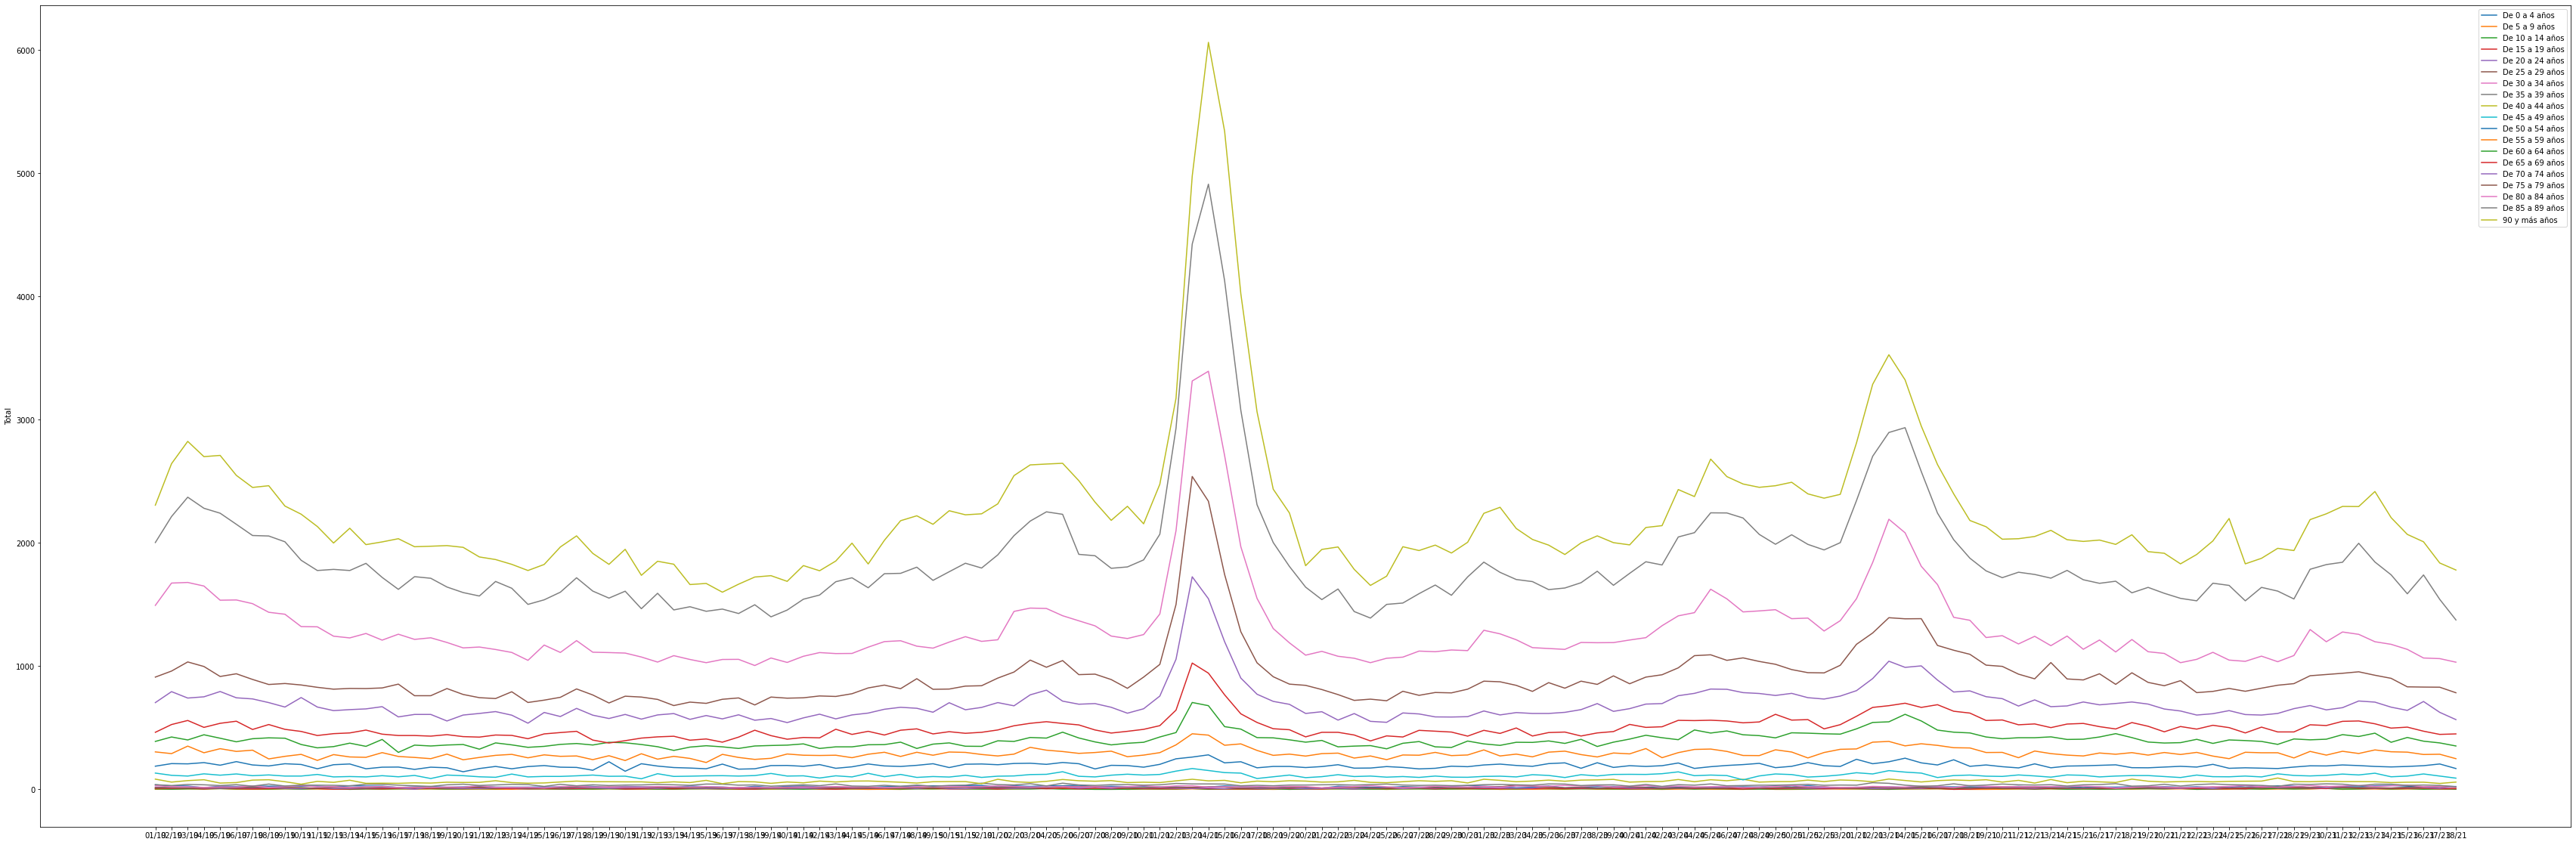

In [25]:
plt.figure(figsize=(60,20))
sns.lineplot(x = new_dates, y = de_0_4['Total'], label = 'De 0 a 4 años');
sns.lineplot(x = new_dates, y = de_5_9['Total'], label = 'De 5 a 9 años');
sns.lineplot(x = new_dates, y = de_10_14['Total'], label = 'De 10 a 14 años');
sns.lineplot(x = new_dates, y = de_15_19['Total'], label = 'De 15 a 19 años');
sns.lineplot(x = new_dates, y = de_20_24['Total'], label = 'De 20 a 24 años');
sns.lineplot(x = new_dates, y = de_25_29['Total'], label = 'De 25 a 29 años');
sns.lineplot(x = new_dates, y = de_30_34['Total'], label = 'De 30 a 34 años');
sns.lineplot(x = new_dates, y = de_35_39['Total'], label = 'De 35 a 39 años');
sns.lineplot(x = new_dates, y = de_40_44['Total'], label = 'De 40 a 44 años');
sns.lineplot(x = new_dates, y = de_45_49['Total'], label = 'De 45 a 49 años');
sns.lineplot(x = new_dates, y = de_50_54['Total'], label = 'De 50 a 54 años');
sns.lineplot(x = new_dates, y = de_55_59['Total'], label = 'De 55 a 59 años');
sns.lineplot(x = new_dates, y = de_60_64['Total'], label = 'De 60 a 64 años');
sns.lineplot(x = new_dates, y = de_65_69['Total'], label = 'De 65 a 69 años');
sns.lineplot(x = new_dates, y = de_70_74['Total'], label = 'De 70 a 74 años');
sns.lineplot(x = new_dates, y = de_75_79['Total'], label = 'De 75 a 79 años');
sns.lineplot(x = new_dates, y = de_80_84['Total'], label = 'De 80 a 84 años');
sns.lineplot(x = new_dates, y = de_85_89['Total'], label = 'De 85 a 89 años');
sns.lineplot(x = new_dates, y = de_90['Total'], label = '90 y más años');
plt.legend()


In [26]:
print(new_dates)

['01/19', '02/19', '03/19', '04/19', '05/19', '06/19', '07/19', '08/19', '09/19', '10/19', '11/19', '12/19', '13/19', '14/19', '15/19', '16/19', '17/19', '18/19', '19/19', '20/19', '21/19', '22/19', '23/19', '24/19', '25/19', '26/19', '27/19', '28/19', '29/19', '30/19', '31/19', '32/19', '33/19', '34/19', '35/19', '36/19', '37/19', '38/19', '39/19', '40/19', '41/19', '42/19', '43/19', '44/19', '45/19', '46/19', '47/19', '48/19', '49/19', '50/19', '51/19', '52/19', '01/20', '02/20', '03/20', '04/20', '05/20', '06/20', '07/20', '08/20', '09/20', '10/20', '11/20', '12/20', '13/20', '14/20', '15/20', '16/20', '17/20', '18/20', '19/20', '20/20', '21/20', '22/20', '23/20', '24/20', '25/20', '26/20', '27/20', '28/20', '29/20', '30/20', '31/20', '32/20', '33/20', '34/20', '35/20', '36/20', '37/20', '38/20', '39/20', '40/20', '41/20', '42/20', '43/20', '44/20', '45/20', '46/20', '47/20', '48/20', '49/20', '50/20', '51/20', '52/20', '53/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', 

In [33]:
#https://www.trt.net.tr/espanol/photogallery/infografia/la-tasa-de-mortalidad-del-coronavirus-por-edades?image=1
tasa = pd.DataFrame()
tasa['Edad'] = ['80 o más', '70-79 años', '60-69 años', '50-59 años', '40-49 años', '10-39 años', '0-9 años']
tasa['Tasa de letalidad'] = ['14,8%', '8%', '3,6%', '1,3%', '0,4%', '0,2%', '< 0,1%']
tasa.set_index('Edad')
tasa.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'tasa.csv'))